In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# Load the data

In [2]:
train=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test=pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
sample=pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')

In [3]:
sample

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


In [4]:
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print(train.shape)
train.head(10)

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Put the labels into y_train**

In [6]:
y_train=train['label']
X_train=train.drop('label',axis=1,inplace=True)

In [7]:
X_train=train.copy()

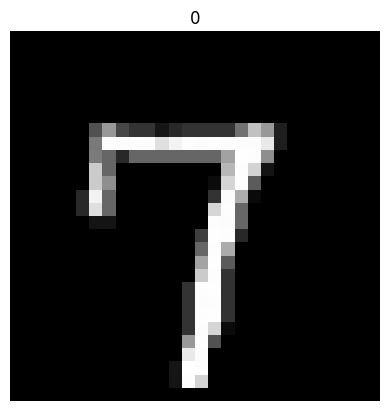

In [8]:
img=X_train.iloc[6].to_numpy()
img=img.reshape(28,28)
plt.imshow(img,cmap='gray')
plt.title(X_train.iloc[8,0])
plt.axis('off')
plt.show()

In [9]:
X_train.iloc[0,0]

0

In [10]:
X_train/=255

In [11]:
X_train=X_train.values.reshape(-1,28,28,1)
print('X_train Shape : ',X_train.shape)

X_train Shape :  (42000, 28, 28, 1)


In [12]:
# One hot encoding 

from keras.utils import to_categorical
y_train=to_categorical(y_train,num_classes=10)

2024-05-10 03:46:28.883332: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-10 03:46:28.883446: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-10 03:46:29.016204: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Train and Val set split

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.2,random_state=42)

In [14]:
print("X_train Shape : ",X_train.shape)
print("X_test Shape : ",X_val.shape)
print("y_train Shape : ",y_train.shape)
print('y_test Shape : ',y_val.shape)

X_train Shape :  (33600, 28, 28, 1)
X_test Shape :  (8400, 28, 28, 1)
y_train Shape :  (33600, 10)
y_test Shape :  (8400, 10)


# CNN Model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten , Dense ,BatchNormalization



model=Sequential([
    
    
    # First Convolution Block
    Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu',input_shape=(28,28,1)),
    
    MaxPool2D(pool_size=(3,3)),
    
    BatchNormalization(),
    
    Dropout(0.1),
    
    # Second Convolution Block
    
    Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'),
    
    MaxPool2D(pool_size=(3,3),strides=(3,3)),
    
    BatchNormalization(),
    
    Dropout(0.1),
    
    # Fully Connected Layers 
    
    Flatten(),
    
    Dense(256,activation='relu'),
    
    Dense(10,activation='softmax')
      
    
])

# Compile The Model

In [16]:
from keras.optimizers import Adam

optimizer=Adam()

model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

# Train the Model

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator()

datagen.fit(X_train)

In [18]:
train_data=datagen.flow(X_train,y_train,batch_size=512)

**Fit the Model**

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
early_stop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          mode='auto',
                           restore_best_weights=True,
                           verbose=1,
                           patience=50
                          
                          )

In [21]:
history= model.fit(train_data,validation_split=0.1,epochs=100,validation_data=(X_val,y_val),steps_per_epoch=X_train.shape[0]//250,verbose=1,callbacks=[early_stop])

Epoch 1/100


2024-05-10 03:46:45.765687: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 1.43362, expected 0.956394
2024-05-10 03:46:45.765748: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 1.60183, expected 1.12461
2024-05-10 03:46:45.765758: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 1.13779, expected 0.660565
2024-05-10 03:46:45.765767: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 1.92319, expected 1.44597
2024-05-10 03:46:45.765775: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 1.55514, expected 1.07792
2024-05-10 03:46:45.765783: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 1.67289, expected 1.19567
2024-05-10 03:46:45.765791: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 2.59992, expected 2.12269
2024-05-10 03:46:45.765799: E external/local_xla/xla/

  7/134 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.2179 - loss: 2.3665

I0000 00:00:1715312809.642946      67 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 13/134 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.3250 - loss: 2.0536

2024-05-10 03:46:51.366846: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 1.93919, expected 1.17633
2024-05-10 03:46:51.366915: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 1.83151, expected 1.06866
2024-05-10 03:46:51.366925: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 1.77781, expected 1.01496
2024-05-10 03:46:51.366935: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 1.83448, expected 1.07163
2024-05-10 03:46:51.366943: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 1.92584, expected 1.16299
2024-05-10 03:46:51.366951: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 1.96136, expected 1.19851
2024-05-10 03:46:51.366959: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 2.65613, expected 1.89327
2024-05-10 03:46:51.366967: E external/local_xla/xla/se

 63/134 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.6449 - loss: 1.1071 

2024-05-10 03:46:55.972337: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 1.087, expected 0.857533
2024-05-10 03:46:55.972415: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 1.20841, expected 0.97894
2024-05-10 03:46:55.972434: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9: 1.2056, expected 0.976126
2024-05-10 03:46:55.972454: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 11: 1.16297, expected 0.933496
2024-05-10 03:46:55.972471: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 12: 1.10739, expected 0.877919
2024-05-10 03:46:55.972485: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 27: 1.08498, expected 0.855513
2024-05-10 03:46:55.972498: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 30: 1.23455, expected 1.00508
2024-05-10 03:46:55.972509: E external/local_xla/

134/134 ━━━━━━━━━━━━━━━━━━━━ 16s 59ms/step - accuracy: 0.7431 - loss: 0.8079 - val_accuracy: 0.1171 - val_loss: 2.1796
Epoch 2/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9597 - loss: 0.1279 - val_accuracy: 0.1208 - val_loss: 2.5990
Epoch 3/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9726 - loss: 0.0875 - val_accuracy: 0.2261 - val_loss: 2.2405
Epoch 4/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9775 - loss: 0.0700 - val_accuracy: 0.3404 - val_loss: 1.7668
Epoch 5/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9822 - loss: 0.0562 - val_accuracy: 0.6801 - val_loss: 0.9052
Epoch 6/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9839 - loss: 0.0504 - val_accuracy: 0.7964 - val_loss: 0.5496
Epoch 7/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9852 - loss: 0.0448 - val_accuracy: 0.9470 - val_loss: 0.1717
Epoch 8/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9887 - loss: 0.0382 - val_accurac

In [22]:
history.history['accuracy']

[0.830297589302063,
 0.9617559313774109,
 0.973422646522522,
 0.9770535826683044,
 0.9824404716491699,
 0.9836905002593994,
 0.9852976202964783,
 0.9881547689437866,
 0.989464282989502,
 0.9894047379493713,
 0.990059494972229,
 0.9913392663002014,
 0.9915773868560791,
 0.9929166436195374,
 0.993154764175415,
 0.9936012029647827,
 0.9937797784805298,
 0.994315505027771,
 0.9949702620506287,
 0.995327353477478,
 0.9954761862754822,
 0.9957440495491028,
 0.996279776096344,
 0.9961606860160828,
 0.996488094329834,
 0.9956845045089722,
 0.996696412563324,
 0.9973214268684387,
 0.996279776096344,
 0.9972916841506958,
 0.9966369271278381,
 0.9969345331192017,
 0.9973809719085693,
 0.9970535635948181,
 0.9977381229400635,
 0.9971725940704346,
 0.9984226226806641,
 0.9982737898826599,
 0.9975297451019287,
 0.9973511695861816,
 0.9976190328598022,
 0.9980952143669128,
 0.998244047164917,
 0.9980059266090393,
 0.9978571534156799,
 0.9986607432365417,
 0.9983928799629211,
 0.9985416531562805,
 0.9

In [23]:
history.history['val_accuracy']

[0.11714285612106323,
 0.12083332985639572,
 0.22607143223285675,
 0.3403571546077728,
 0.6801190376281738,
 0.7964285612106323,
 0.9470238089561462,
 0.9751190543174744,
 0.9815475940704346,
 0.9852380752563477,
 0.9894047379493713,
 0.9897618889808655,
 0.9894047379493713,
 0.9894047379493713,
 0.9900000095367432,
 0.9909523725509644,
 0.9891666769981384,
 0.9902380704879761,
 0.9905952215194702,
 0.9910714030265808,
 0.9897618889808655,
 0.9913095235824585,
 0.9910714030265808,
 0.9905952215194702,
 0.991190493106842,
 0.9916666746139526,
 0.991428554058075,
 0.9907143115997314,
 0.9907143115997314,
 0.991190493106842,
 0.9909523725509644,
 0.9913095235824585,
 0.9917857050895691,
 0.9920238256454468,
 0.9921428561210632,
 0.991190493106842,
 0.9920238256454468,
 0.9901190400123596,
 0.9919047355651855,
 0.9910714030265808,
 0.9900000095367432,
 0.9910714030265808,
 0.991190493106842,
 0.9909523725509644,
 0.9909523725509644,
 0.991190493106842,
 0.9908333420753479,
 0.9901190400123

In [24]:
history.history['loss']

[0.5420386791229248,
 0.120907261967659,
 0.08442779630422592,
 0.06986800581216812,
 0.056307390332221985,
 0.050639115273952484,
 0.044609613716602325,
 0.039112068712711334,
 0.03466635197401047,
 0.03213154524564743,
 0.029863834381103516,
 0.0270609762519598,
 0.025550436228513718,
 0.022493794560432434,
 0.02084638737142086,
 0.020510055124759674,
 0.01881192810833454,
 0.018207605928182602,
 0.015511403791606426,
 0.01480388268828392,
 0.01477353647351265,
 0.012602412141859531,
 0.011495763435959816,
 0.011708736419677734,
 0.011535345576703548,
 0.012541422620415688,
 0.010111472569406033,
 0.00868954323232174,
 0.00945335254073143,
 0.008662836626172066,
 0.009541191160678864,
 0.008500466123223305,
 0.007934588938951492,
 0.008372971788048744,
 0.006809441838413477,
 0.007849819958209991,
 0.005781872663646936,
 0.005424872040748596,
 0.007519400212913752,
 0.00788913294672966,
 0.0071494425646960735,
 0.005153031554073095,
 0.005943782161921263,
 0.005790880415588617,
 0.00

# Plot Results

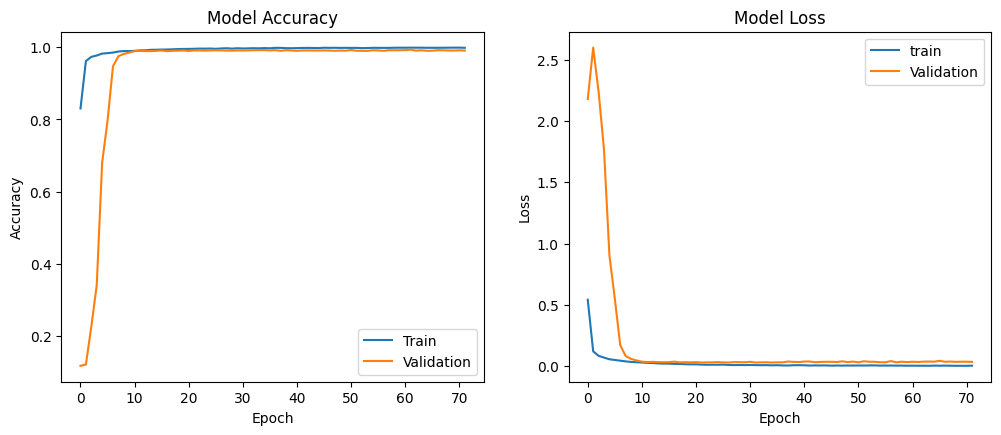

In [25]:

plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'],loc='best')


plt.subplot(2,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','Validation'],loc='best')

plt.show()

# Results

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


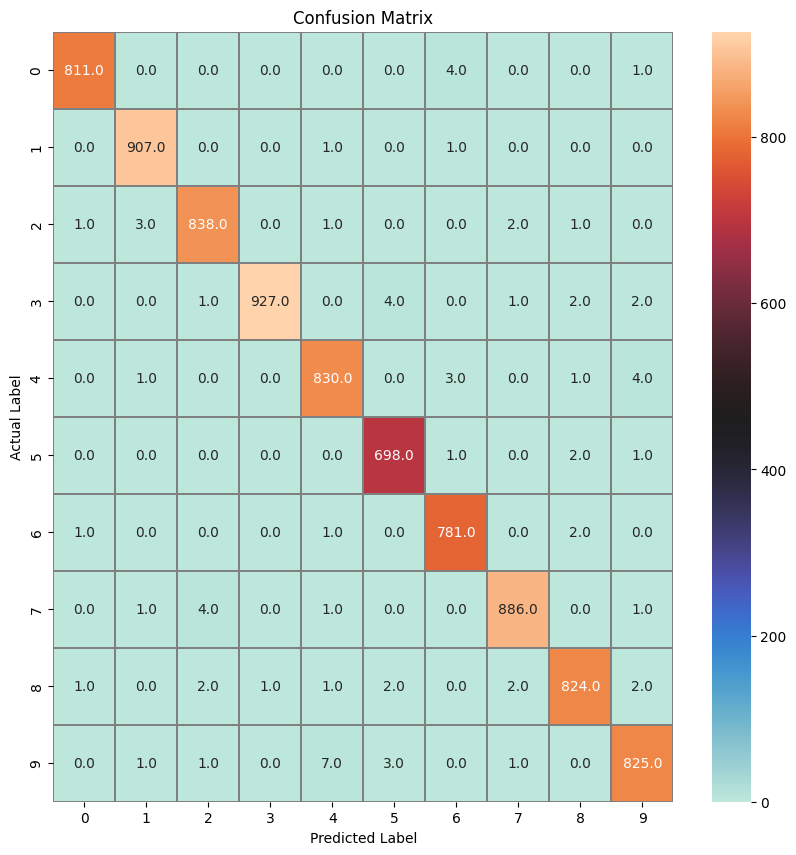

In [26]:
from sklearn.metrics import confusion_matrix

# predict the values from validation dataset
y_pred = model.predict(X_val)

# convert prediction class to one vector 
y_pred_classes = np.argmax(y_pred,axis=1)

# Convert the validation observations to one hot vectors 
y_true = np.argmax(y_val,axis=1)

# Compute Confusion Matrix
cm = confusion_matrix(y_true,y_pred_classes)

fig ,ax = plt.subplots(figsize=(10,10))

sns.heatmap(cm,annot=True,cmap='icefire',linewidths=0.01,linecolor='gray',fmt='0.1f',ax=ax)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
fig.show()

In [27]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_true,y_pred_classes)*100
print(f'The score of  this model is : {score:0.2f}%')

The score of  this model is : 99.13%


# predicts given test dataset

In [28]:
test/=255

In [29]:
test=test.values.reshape(-1,28,28,1)
print('X_train Shape : ',test.shape)

X_train Shape :  (28000, 28, 28, 1)


In [30]:
predictions=model.predict(test)

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [31]:
predictions

array([[6.3736301e-11, 4.2429642e-09, 1.0000000e+00, ..., 1.5152963e-08,
        9.9199393e-10, 9.8809296e-13],
       [9.9999797e-01, 3.0139782e-13, 1.4972076e-09, ..., 5.2448147e-11,
        7.2727033e-09, 8.8030436e-09],
       [1.6601681e-10, 2.3378197e-11, 1.7298788e-07, ..., 5.8883842e-08,
        2.9811638e-06, 9.9999642e-01],
       ...,
       [1.4711530e-17, 2.2485825e-13, 4.5802381e-12, ..., 7.3748741e-12,
        3.3385419e-11, 3.3585098e-13],
       [1.3133805e-09, 7.8799189e-10, 1.8709329e-08, ..., 2.3968185e-05,
        1.6999845e-09, 9.9958354e-01],
       [5.3589972e-13, 6.9755625e-12, 1.0000000e+00, ..., 1.9259237e-10,
        9.9195985e-10, 1.3577509e-12]], dtype=float32)

In [32]:
pred_classes = np.argmax(predictions,axis=1)
pred_classes

array([2, 0, 9, ..., 3, 9, 2])

In [33]:
print('len of test dataset : ',len(test))

print('len of predicted dataset : ',len(pred_classes))

len of test dataset :  28000
len of predicted dataset :  28000


In [34]:
submission = pd.DataFrame({'Label': pred_classes})

In [35]:
submission['ImageId'] = np.arange(1, len(submission) + 1)

In [36]:
submission = submission [['ImageId','Label']]

In [37]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [38]:
submission_df = pd.DataFrame({
    'ImageId': range(1, len(pred_classes) + 1),  # ImageId starts from 1 and increases gradually
    'Label': pred_classes  # Predicted labels
})

# Save the DataFrame to a CSV file in the specified format
submission_df.to_csv('submission.csv', index=False)